# Nuggets and `gap`

## Pedro A. García Sánchez (Universidad de Granada)

The problem is simple. You want to buy a certain amount of nuggets, and the store offers boxes of 6, 9 and 20 (as it was in MacDonnald's sometime in the last century; nowadays the boxes are not so generous). You actually want to have the exact amount of Nuggets you want to eat, no one above no one below. So for instance, you cannot buy four nuggets, not 10. But you have several ways to buy 18 nuggets: three boxes of six, or two boxes of nine.

We want to visualize first in how many ways can we buy a certain amount of Nuggets. To this end we will use the [`gap`](https://www.gap-system.org) function `NrRestrictedPartitions` and the `gap` package [`jupyterviz`](https://nathancarter.github.io/jupyterviz/). We will also give some hints on how to use [`francy`](https://gap-packages.github.io/francy/). 

Notice that the amounts that we correspond with finite sums of integers in the set $\{6,9,20\}$, and thus we are talking about the semigroup $\langle 6,9,20\rangle$. We will use `numericalsgps` to work with numerical semigroups.

If you want to know more about nuggets and numerical semigroups, please refer to this [book chapter](https://link.springer.com/chapter/10.1007/978-3-030-37853-0_6), this [paper](https://www.tandfonline.com/doi/abs/10.1080/0025570X.2018.1515559?journalCode=umma20) and this [manuscript](https://arxiv.org/abs/1912.04494).

In [1]:
LoadPackage("francy");

true

In [2]:
LoadPackage("jupyterviz");

true

We want graphs and diagrams stored on the notebook.

In [3]:
PlotDisplayMethod:=PlotDisplayMethod_JupyterSimple;

"PlotDisplayMethod_JupyterSimple"

In [4]:
LoadPackage("numericalsgps");

true

Let us start by showing how many ways of buying Nuggets do we have in the range $\{0,\ldots,50\}$.

In [5]:
Plot([0..50], x->NrRestrictedPartitions(x,[6,9,20]), 
 rec(
title := "Different ways to buy this many Nuggets",
          xaxis := "n",
yaxis := "number of expressions of n in terms of the boxes", 
xaxis := "number of Nuggets, n",
type:="bar"
      ));

Clearly for elements outside $\langle 6,9,20\rangle$ there will be no possible choice of boxes to get that specific amount of nuggets.

In [6]:
S:=NumericalSemigroup(6,9,20);

Numerical semigroup with 3 generators

In [7]:
realizable:=Intersection(S,[0..50]);

[ 0, 6, 9, 12, 15, 18, 20, 21, 24, 26, 27, 29, 30, 32, 33, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50 ]

The amounts of nuggets that we cannot buy with this box offer are precisely the gaps of $S$.

In [8]:
Gaps(S);

[ 1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 22, 23, 25, 28, 31, 34, 37, 43 ]

We will now overprint to the above bar diagram the minimum number of boxes required to obtain the dessired number of Nuggets. 

In [11]:
sizes:=[6,9,20];;
realizable:=Intersection(S,[0..100]);;
Plot([realizable, x->NrRestrictedPartitions(x,sizes), 
 rec(
title := "Different ways to buy this many Nuggets",
          xaxis := "n",
yaxis := "number of expressions of n in terms of the boxes", 
xaxis := "number of Nuggets, n",
type:="bar"
)], 
[realizable, x->Minimum(List(RestrictedPartitions(x,sizes),Length)), 
 rec(
type:="line", name:="min # boxes",
)],
[realizable, x->Maximum(List(RestrictedPartitions(x,sizes),Length)), 
 rec(
type:="line", name:="max # boxes",
)]
);

Let us have a closer look at the number of ways one can buy 150 nuggets.

In [14]:
p:=RestrictedPartitions(150,sizes);;
ls:=List(p,Length);;
Plot(Set(ls),x->Length(Filtered(ls,l->l=x)), rec(type:="pie", height:=500, 
title:="Classifying the number of different ways to buy 150 Nuggets, depending on the number of boxes needed"));

In [15]:
Plot(Set(ls),x->Length(Filtered(ls,l->l=x)), rec(xaxis:="Number of boxes needed for 150 nuggets", 
yaxis:="# possibilities"));

In [16]:
p;

[ [ 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6 ], [ 20, 20, 20, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9 ], [ 20, 20, 20, 20, 20, 20, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 20, 20, 20, 9, 9,

We can, for every possible choice, plot the number of boxes needed for each "realizable" amount of nuggets (thanks to [@nathancarter](https://nathancarter.github.io/) for showing how to do scatter plots)

In [19]:
l:=[];;
for s in Intersection([0..50],S) do
    Append(l,List(LengthsOfFactorizationsIntegerWRTList(s,sizes), l->[s,l]));;
od;
Plot(l,rec(type:="scatter",tool:="canvasjs"));

Let us illustrate a naïve way to determine all possible ways to buy $n$ nuggets with boxes of sizes $\{s_1,\ldots,s_k\}$. The idea is quite simple, and we can draw it in a tree. We discriminate the possible ways depending on which we use the box of size $s_1$ or not, that is, $n\in\langle s_1,\ldots,s_k\}$ if either $n-s_1\in\langle s_1,\ldots,s_k\rangle$ or $n\in\langle s_2,\ldots, s_k\rangle$ (and proceed recursively). 

If in this process we reach a negative integer, we stop, and if we arrive to zero, then we trace the boxes we have used. We will draw this leafs of the tree as a square, and when hovering with the mouse over them, we will show the boxes used to get $n$ nuggets.

In [20]:
treefrancy:=function(n,sizes)
    local l, sons, t,  ps, canvas, graphTree,shpr;

    sons:=function(m,lm,szs,shpm)
        local ns,shp;
        if m<0 then 
            return;
        fi;
        ns:=Length(szs);
        if ns=0 then 
            return;
        fi;
        if m=szs[1] then 
            shp:=Shape(ShapeType!.SQUARE, String(0));
            SetSize(shp,5);
            Add(graphTree,shp);
            SetParentShape(shp,shpm);
            Add(shp,FrancyMessage(String(Concatenation(lm,[szs[1]]))));
            Add(ps,Concatenation(lm,[szs[1]]));
        fi;
        if (m-szs[1]>0) then
            shp:=Shape(ShapeType!.CIRCLE, String(m-szs[1]));
            SetSize(shp,5);
            Add(graphTree,shp);
            SetParentShape(shp,shpm);
            Add(ps,Concatenation(lm,[szs[1]]));
            sons(m-szs[1],Concatenation(lm,[szs[1]]),szs,shp);
        fi;
        sons(m,lm,szs{[2..ns]},shpm);
    end;

    t:=[];
    l:=[];
    ps:=[];
    graphTree := Graph(GraphType.TREE);
    SetCollapsed(graphTree,false);
    shpr:=Shape(ShapeType!.CIRCLE, String(n));
    SetSize(shpr,5);
    #Add(shpr,FrancyMessage(Concatenation(String(n)," ",String(l))));
    Add(graphTree,shpr);
    canvas:=Canvas("Boxes");
    SetTexTypesetting(canvas, true);
    Add(canvas,graphTree);
    sons(n,l,sizes,shpr);
    return Draw(canvas);
end;


function( n, sizes ) ... end

In [21]:
treefrancy(30,sizes);

In [22]:
S:=NumericalSemigroup(sizes);

Numerical semigroup with 3 generators

There are other ways to construct all possible combinations of boxes to reach the desired amount of nuggets. We can think about $\langle 6, 9 , 20\rangle$ as an object generated by three elements together with some relations among these generators (relations). We can use `MinimalPresentation` to obtain these relations. 

In [23]:
mps:=MinimalPresentation(S);

[ [ [ 1, 6, 0 ], [ 0, 0, 3 ] ], [ [ 3, 0, 0 ], [ 0, 2, 0 ] ] ]

One may think about these relations as trades. So fors instance, one can change tree boxes of size six with two of size nine.

Let us write a graph depicting all trades performed starting from a known possible choice of boxes.

In [24]:
trades:=function(f,tds)
    local nonneg, sons, edges, vertices;

    nonneg:=function(l)
        return ForAll(l, x-> x>=0);
    end;

    sons:= function(fc)
        local ptds, t,fcs;
        if not(nonneg(fc)) then
            return;
        fi;
        ptds:=Filtered(tds, t->nonneg(fc-t[1]));
        for t in ptds do
            fcs:=fc-t[1]+t[2];
            Add(vertices,fcs);
            Add(edges,[fc,fcs]);
            sons(fcs);
        od;
    end;
    
    vertices:=[f];
    edges:=[];
    sons(f);

    return PlotGraph(vertices, edges, rec(directed:=true, layout:="cose", arrowscale:=2));
end;

function( f, tds ) ... end

In [25]:
trades([20,0,0], mps);

Since there are only two relations (trades), we can force a grid shape in the 'trading' graph. Vertices in `jupyterviz` graphs can store their position.

In [27]:
step:=75;;
tradespreset:=function(f,tds)
    local nonneg, sons, edges, vertices;

    nonneg:=function(l)
        return ForAll(l, x-> x>=0);
    end;

    sons:= function(fc,vx,vy)
        local t,fcs;
        if not(nonneg(fc)) then
            return;
        fi;
        if nonneg(fc-tds[1][1]) then
            fcs:=fc-tds[1][1]+tds[1][2];
            Add(vertices,rec(name:=String(fcs),x:=vx+step,y:=vy));
            Add(edges,[fc,fcs]);
            sons(fcs,vx+step,vy);
        fi;
        if nonneg(fc-tds[2][1]) then
            fcs:=fc-tds[2][1]+tds[2][2];
            Add(vertices,rec(name:=String(fcs),x:=vx,y:=vy+step));
            Add(edges,[fc,fcs]);
            sons(fcs,vx,vy+step);
        fi;
    end;
    
    vertices:=[rec(name:=String(f),x:=0,y:=0)];
    edges:=[];
    sons(f,0,0);

    return PlotGraph(vertices, edges, rec(directed:=true, layout:="preset", arrowscale:=2));
end;

function( f, tds ) ... end

In [28]:
tradespreset([20,0,0],mps);

Minimal presentations (trade systems) might not be unique. For our sizes of boxes we have another choices, since in the first component of the first trade, we can apply the second to obtain a new trade [[4,4,0],[0,0,3]], and applying it once more, we obtain [[7,2,0],[0,0,3]]. 

In [29]:
[4,4,0]*[6,9,20]=[7,2,0]*[6,9,20];

true

These are indeed the factorizations of 60.

In [30]:
FactorizationsIntegerWRTList(60,sizes);

[ [ 10, 0, 0 ], [ 7, 2, 0 ], [ 4, 4, 0 ], [ 1, 6, 0 ], [ 0, 0, 3 ] ]

We can choose another trade system, and will obtain another 'trading' graph.

In [31]:
tradespreset([20,0,0],[[[10,0,0],[0,0,3]],[[3,0,0],[0,2,0]]]);

Trades in a numerical semigroup (or relations) can be obtained from some specific elements in the semigroup. We have seen that one of our possible trades can be choosen from a pair of expressions of 60 as combinations of 6, 9, and 20. What makes 60 special is that there are some expressions of 60 in terms of 6, 9 and 20 where only 6 and 9 show up, and another were 20 is the only size of box used.

We can draw a graph with vertices the set of possible combinations (expressions, factorizations) of $n$ in terms of $\lbrace s_1,\ldots, s_k\rbrace$, and there is an edge between two combinations if in the expression there is a common box used.

There are several `gap` packages that offer procedures that output graphs in `dot` language. In order to make these outputs visible in the notebook one can use `JupyterSplashDot`.

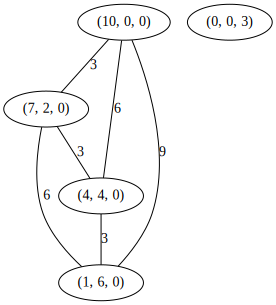

In [32]:
JupyterSplashDot(DotEliahouGraph(FactorizationsIntegerWRTList(60,sizes)));

There are exactly two elements with nonconnected associated graph in $S$. One is 60, the other already showed up: 18.

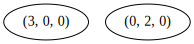

In [33]:
JupyterSplashDot(DotEliahouGraph(FactorizationsIntegerWRTList(18,sizes)));

In order to obtain a 'complete trade system' that allows us to go from any combination of boxes to any other choice, we only need to take expressions in different connected components of the above graphs, so that there is a trade connecting both connected components. 

In [34]:
BettiElements(S);

[ 18, 60 ]

Another way to visualize possible combinations is through `DotFactorizationGraph` that shows the set of expressions of a nonnegative integer in terms of a given set of nonnegative integers depicted in a graph: the vertices are labelled with the different combinations, and in the edges shows the "distance" between factorizations. In red a minimal spanning tree is highlighted. The largest distance in the minimal spanning tree is known as the catenary degree of the integer in the numerical semigroup.

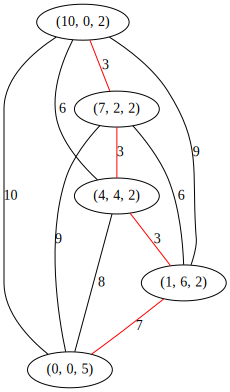

In [35]:
JupyterSplashDot(DotFactorizationGraph(FactorizationsIntegerWRTList(100,sizes)));

In [36]:
CatenaryDegree(100,S);

7

It has been shown that the catenary degree strongly depends on the trades, and that it becomes eventually periodic.

In [37]:
Plot(Intersection(S,[0..150]), x->CatenaryDegree(x,S), 
 rec(
title := "catenary degree of elements in the semigroup",
          xaxis := "n",
yaxis := "catenary degree", type:="bar" ));

The maximum can be computed with the trades.

In [38]:
CatenaryDegree(S);

7

We saw above a plot with the possible number of boxes required for each amount of nuggets, and as expected the number of boxes will increase as the amount of nuggets increases. There is a measure to detect how spread are this boxes (notice that the catenary degree already measures somehow this based on distances): we can compute the difference of two consecutive possible number of boxes of a fixed amount of nuggets. This invariant is known as the Delta set, and it is upper bounded from by the Delta set of the elements appearing in a minimal presentation of the semigroup.

In [41]:
l:=[];;
for s in Intersection([0..50],S) do
    Append(l,List(DeltaSet(LengthsOfFactorizationsIntegerWRTList(s,sizes)), d->[s,d]));;
od;
Plot(l,rec(type:="scatter",tool:="canvasjs"));

The union of all Delta sets can be computed explicitly (though in general requires some complex computations).

In [42]:
DeltaSet(S);

[ 1, 2, 3, 4 ]

Observe that in the above plot, we have not catched all possibilities. We will extend the range, until we get all possible "deltas".

In [45]:
l:=[];;
for s in Intersection([0..100],S) do
    Append(l,List(DeltaSet(LengthsOfFactorizationsIntegerWRTList(s,sizes)), d->[s,d]));;
od;
Plot(l,rec(type:="scatter",theme:="light1",animationEnabled:=false,tool:="canvasjs"));

Let us customize this plot without colors.

In [55]:
dataSeries := JUPVIZMakePlotDataSeries(l);;
c:=ConvertDataSeriesForTool.canvasjs([dataSeries]);;
c.theme:="light1";;
c.data[1].type:="scatter";;
c.data[1].markerType:="circle";;
c.data[1].color:="blue";;
c.axisX:=rec(interval:=5);;
c.axisY:=rec(interval:=1);;
c.height:=250;;
CreateVisualization(rec(tool := "canvasjs",data:=c));

Let us see what are the "deltas" involved in our trading system.

In [56]:
BettiElements(S);

[ 18, 60 ]

In [57]:
DeltaSet(LengthsOfFactorizationsIntegerWRTList(18,sizes));

[ 1 ]

In [58]:
DeltaSet(LengthsOfFactorizationsIntegerWRTList(60,sizes));

[ 1, 4 ]

We have seen that there are two trades in the trading system of our numerical semigroup $\langle 6,9,20\rangle$ (two relations in a minimal presentation). It can be shown that the minimal number of trades is at least the number of generators (sizes of boxes) minus one, and the semigroups attaining this lower bound are known as complete intersections (precisely because its associated semigroup rings are complete intersections). 

In [59]:
IsCompleteIntersection(S);

true

It can be shown that a numerical semigroup is a complete intersection if either it is $\mathbb{N}$ or it is a gluing of two complete intersection numerical semigroups. We say that a $S$ is a gluing of $S_1$ and $S_2$ if $S=a_1S_1+a_2S_2$, with $a_1$ an element in $S_2$ that is not a minimal generator and $a_2$ is an element of $S_1$ that is not a minimal generator. In our semigroup, $\langle 6,9,20\rangle=\langle 6,9\rangle + \langle 20\rangle=3\langle 2,3\rangle+ 20\mathbb{N}$. We can get the possible list of decompositions in the following way.

In [60]:
AsGluingOfNumericalSemigroups(S);

[ [ [ 6, 9 ], [ 20 ] ], [ [ 6, 20 ], [ 9 ] ] ]

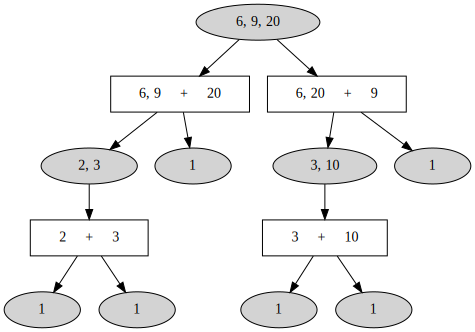

In [61]:
JupyterSplashDot(DotTreeOfGluingsOfNumericalSemigroup(S));

Complete intersection numerical semigroups are symmetric, meaning that for any integer $z$, either $z$ is in the semigroup of $F-z$ is in the semigroup, where $F$ is the Frobenius number of the semigroup (the largest amount of integer that is not representable with the given set of sizes of boxes). Recall that the Frobenius number of $S$ is 43.

In [62]:
FrobeniusNumber(S);

43

Clearly, every integer greater than $43$ is in $S$, and if $z$ is negative, then $F-z$ is in $S$. So in order to check symmetry in $S$ we only have to deal with the interval $\{1,\ldots,42\}$.  

In [63]:
ForAll([1..42], x-> (x in S) or (43-x in S));

true

In [64]:
IsSymmetric(S);

true

Symmetry implies that the Frobenius number must be odd, and that there are as many gaps as non gaps below the Frobenius number. In a numerical semigroup, the genus (the number of gaps) is always at least one half of the Frobenius number of the semigroup plus one. Symmetric numerical semigroups are precisely those semigroups attaining this bound, or equivalently, they are maximal (with respect to set inclusion) in the set of all numerical semigroups having the same (odd) Frobenius number. 

In [65]:
Genus(S);

22

In [66]:
(FrobeniusNumber(S)+1)/2;

22

We can plot the small elements and gaps of our monoid. Gaps will be in red (thanks to [@nathancarter](https://nathancarter.github.io/) for showing how to choose colors for vertices).

In [71]:
ns:=[];;
for i in [0..43] do
    Add(ns,rec( data := rec( id := String(i) ), position:=rec(x:=50*i,y:=0) ));
od;
st:=[rec(selector := "node", style := rec( content := "data(id)" ))];;
for i in Intersection(Gaps(S),[0..43]) do
    Add(st, rec(selector := Concatenation("#",String(i)), style := rec( backgroundColor := "red" ))); 
od;

CreateVisualization( rec(
    tool := "cytoscape",
    height := 100,
    data := rec(elements := ns,layout := rec( name := "preset" ),style := st)
    ) 
);

Symmetry can also be characterized in terms of the Apéry sets of the numerical semigroup. For a given nonzero element $n$ of $S$, the Apéry set of $n$ in $S$ is defined as the set $\{s\in S \mid s-n\notin S\}$. 

Every numerical semigroup defines an orden over the integers $a\le_S b$ if $b-a\in S$. It can be shown that a numerical semigroup $S$ is symmetric if and only if there is a maximum in the Apéry set of a (any) nonzero element with respect to $\le_S$. 

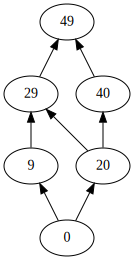

In [72]:
JupyterSplashDot(DotBinaryRelation(HasseDiagramOfAperyListOfNumericalSemigroup(S)));

When not specified, the Apéry set is computed with respect to the multiplicity, the least positive integer in the semigroup (in our case six). The maximum in this case is 49. In general, for a numerical semigroup $T$ the greatest element (which is then a maximal element with respect to $\le_T$, though not necessarily a maximum) in the Apéry set of $n\in T\setminus\{0\}$ is the Frobenius number of $T$ plus $n$. In our example, 49=43+6.

Another characterization of symmetric numerical semigroups is that they are irreducible numerical semigroups with odd Frobenius number. A numerical semigroup is said to be irreducible if it cannot be expressed as the intersection of two numerical semigroups properly containing it.

In [73]:
IsIrreducible(S);

true

Indeed, the proportion of complete intersections compared with irreducibles is relatively small.

In [74]:
Length(CompleteIntersectionNumericalSemigroupsWithFrobeniusNumber(43));

31

In [75]:
Length(IrreducibleNumericalSemigroupsWithFrobeniusNumber(43));

546

We can plot the elements and gaps of our monoid modulo six (the multiplicity).

In [82]:
S:=NumericalSemigroup(6,9,20);;
ns:=[];;

for i in [0..43] do
    Add(ns,rec( data := rec( id := String(i) ), position:=rec(x:=50*(i mod 6),y:=50*Int(i/6)) ));
od;
st:=[rec(selector := "node", style := rec( content := "data(id)" ))];;
for i in Intersection(Gaps(S),[0..43]) do
    Add(st, rec(selector := Concatenation("#",String(i)), style := rec( backgroundColor := "red", shape:="rectangle" ))); 
od;
for i in Intersection(SmallElements(S),[0..43]) do
    Add(st, rec(selector := Concatenation("#",String(i)), style := rec( backgroundColor := "blue", shape:="rectangle" ))); 
od;

CreateVisualization( rec(
    tool := "cytoscape",
    height := 400,
    data := rec(elements := ns,layout := rec( name := "preset" ),style := st)
    ) 
);

Observe that from this picture one easily guess the Apéry set of 6 in the numerical semigorup. 

The heights of the columns of the red "columns" is known as the Kunz coordinates of the semigroup, and it uniquely determines it. This allows, for a fixed element in the semigroup, to make a one to one correspondence between the numerical semigroups having this element and a set of integer cones in a polytope.

In [83]:
AperyList(S);

[ 0, 49, 20, 9, 40, 29 ]

In [73]:
KunzCoordinates(S);

[ 8, 3, 1, 6, 4 ]

In [74]:
KunzPolytope(6);

[ [ 1, 0, 0, 0, 0, -1 ], [ 0, 1, 0, 0, 0, -1 ], [ 0, 0, 1, 0, 0, -1 ], [ 0, 0, 0, 1, 0, -1 ], [ 0, 0, 0, 0, 1, -1 ], [ 2, -1, 0, 0, 0, 0 ], [ 1, 1, -1, 0, 0, 0 ], [ 1, 0, 1, -1, 0, 0 ], [ 1, 0, 0, 1, -1, 0 ], [ 0, 2, 0, -1, 0, 0 ], [ 0, 1, 1, 0, -1, 0 ], [ -1, 1, 0, 0, 1, 1 ], [ -1, 0, 1, 1, 0, 1 ], [ 0, -1, 1, 0, 1, 1 ], [ 0, -1, 0, 2, 0, 1 ], [ 0, 0, -1, 1, 1, 1 ], [ 0, 0, 0, -1, 2, 1 ] ]

Every element $[a_1,a_2,a_3,a_4,a_5,b]$ in this list corresponds to the inequality $a_1x_1+a_2x_2+a_3x_3+a_4x_4+a_5x_5+b\ge 0$.

There is still another way to produce the above picture directly using html.

In [84]:
r:="""
<canvas id="canvas123" width="150" height="220"></canvas>
<script type="application/javascript">
var canvas = document.getElementById('canvas123');
var context = canvas.getContext('2d');
var x,y,i;
var s = [ 0, 6, 9, 12, 15, 18, 20, 21, 24, 26, 27, 29, 30, 32, 33, 35, 36, 38, 39, 40, 41, 42, 44 ];
var len = s.length;
context.font = '16px courier';
for (i=0; i < len;i++) {
x= s[i] % 6; y = (s[i]-x)/6;
context.fillStyle = '#9090ff';
context.fillRect(x * 25, y * 25, 24, 24);
context.fillStyle = 'white';
context.fillText(s[i],x*25+12-context.measureText(s[i]).width/2,y*25+17);
}
var g = [ 1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 22, 23, 25, 28, 31, 34, 37, 43 ];
var len = g.length;
context.font = '16px courier';
for (i=0; i < len;i++) {
x= g[i] % 6; y = (g[i]-x)/6;
context.fillStyle = '#ff5050';
context.fillRect(x * 25, y * 25, 24, 24);
context.fillStyle = 'white';
context.fillText(g[i],x*25+12-context.measureText(g[i]).width/2,y*25+17);
}
</script>
""";;

In [85]:
Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := r ), metadata:=rec() ));